In [1]:
from sklearn.utils import resample
import pandas as pd
from matplotlib import pyplot as plt
import pingouin as pg
import numpy as np
import seaborn as sns

np.random.seed(42)
plt.rcParams["figure.figsize"] = (16, 9)

# One-sample test of central values

## Mean

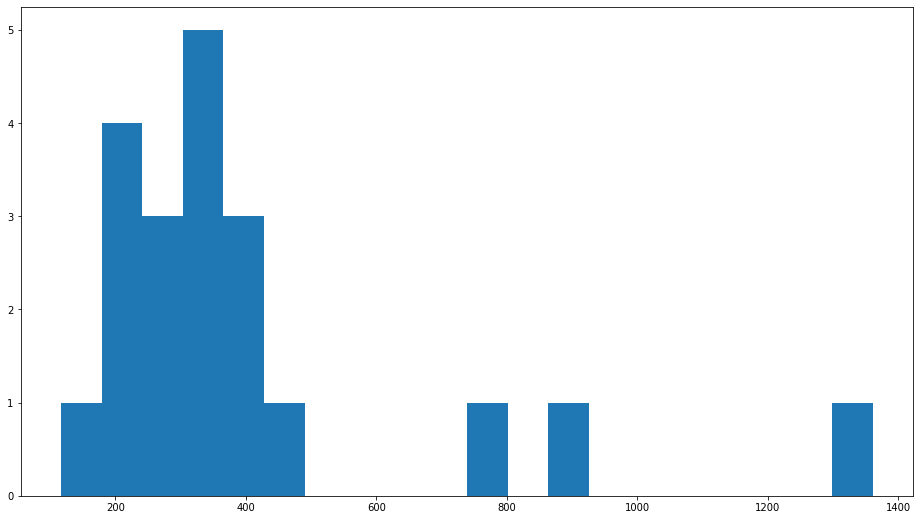

In [2]:
spl = [117, 203, 243, 197, 217, 224, 279, 301, 317, 307, 324, 357, 364, 382, 413, 427, 490, 742, 873, 1361]
plt.hist(spl, bins=20);

In [27]:
pgtt = pg.ttest(spl, 0)
print(pgtt['CI95%'][0])

[272.34 541.46]


In [29]:
B = 10000
rs = np.zeros((B, len(spl)), dtype=np.int)
for i in range(B):
    rs[i,] = resample(spl, replace = True)
print(rs)

[[ 117  364  324 ...  324  203  490]
 [ 307  873  427 ...  382  324 1361]
 [ 324  324  117 ...  357  382  301]
 ...
 [ 203  742 1361 ...  217  117  427]
 [ 117  243  203 ...  357  317 1361]
 [ 742  742  203 ...  427  364  357]]


In [5]:
bd = np.mean(rs, axis=1)
print(bd)

[376.35 515.15 342.75 ... 507.8  426.15 377.05]


In [6]:
bootci = np.percentile(bd, (2.5, 97.5))
print(bootci)

[300.0975 541.705 ]


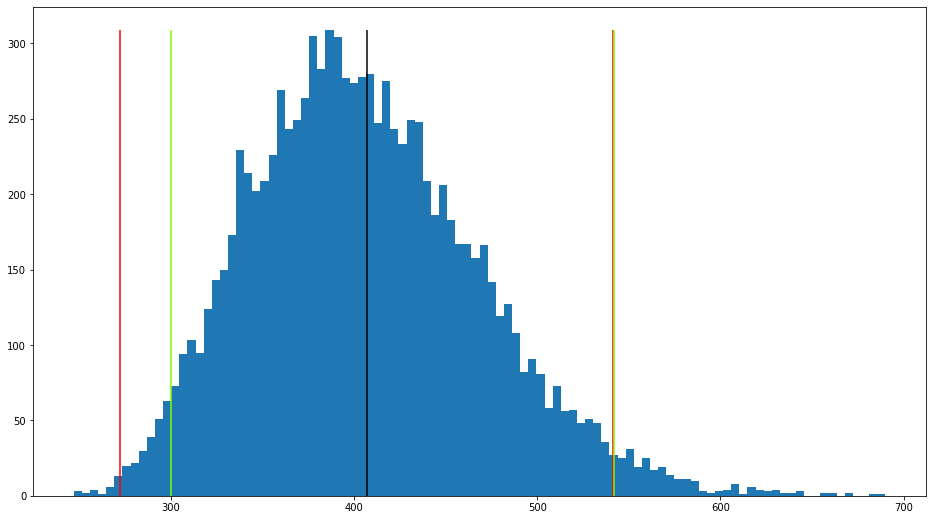

In [7]:
y, x, _ = plt.hist(bd, bins=100)
ymax = y.max()
plt.vlines(pgtt['CI95%'][0], 0, ymax, colors = 'red')
plt.vlines(bootci, 0, ymax, colors = 'chartreuse')
plt.vlines(np.mean(spl), 0, ymax, colors = 'black')
plt.show();

## Median

In [8]:
bd = np.median(rs, axis = 1)
bootci = np.percentile(bd, (5, 95))
print(bootci)

[279. 382.]


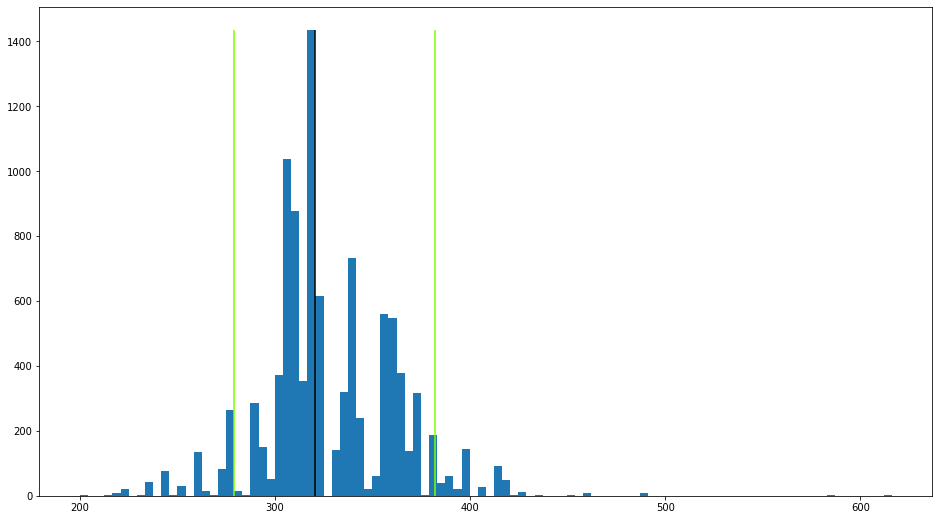

In [9]:
y, x, _ = plt.hist(bd, bins=100)
ymax = y.max()
plt.vlines(bootci, 0, ymax, colors = 'chartreuse')
plt.vlines(np.median(spl), 0, ymax, colors = 'black')
plt.show();

## Variance

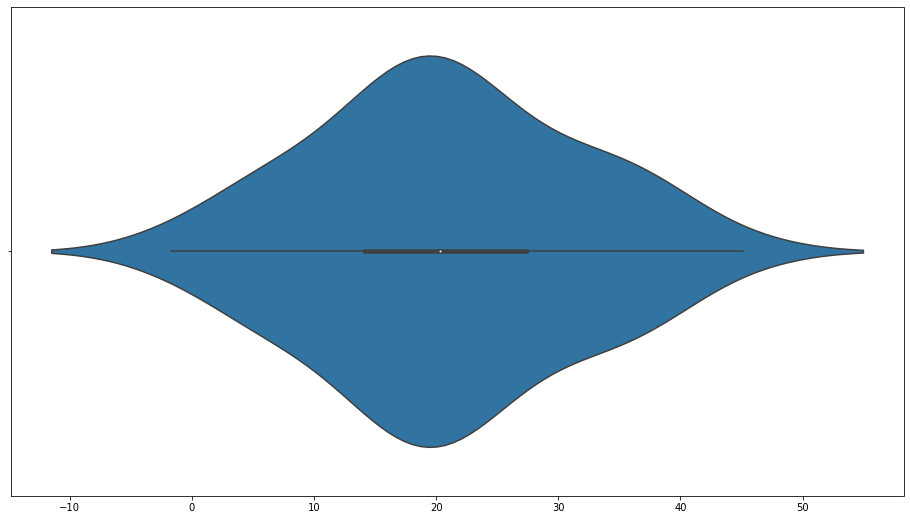

In [10]:
sp = np.random.normal(loc=20, scale=10, size=50)
sns.violinplot(x=sp);

In [11]:
print(np.var(sp))

112.88909322502681


In [12]:
rs = np.zeros((B, len(sp)), dtype=np.float)
for i in range(B):
    rs[i,] = resample(sp, replace=True)
bd = np.var(rs, axis=1)
bootci = np.percentile(bd, (2.5, 97.5))
print(bootci)

[ 74.91889462 151.31601521]


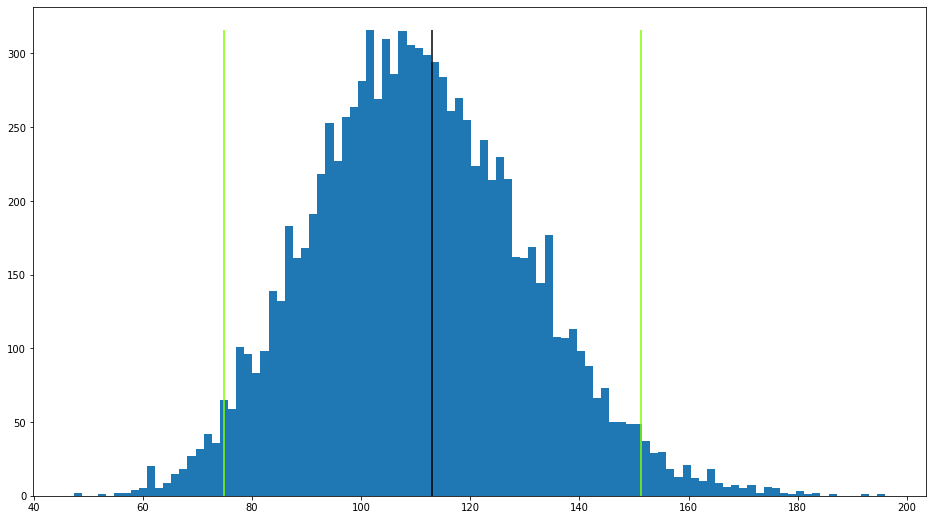

In [13]:
y, x, _ = plt.hist(bd, bins=100)
ymax = y.max()
plt.vlines(bootci, 0, ymax, colors = 'chartreuse')
plt.vlines(np.var(sp), 0, ymax, colors = 'black')
plt.show();

# Two-sample central values, unpaired

## Difference of means

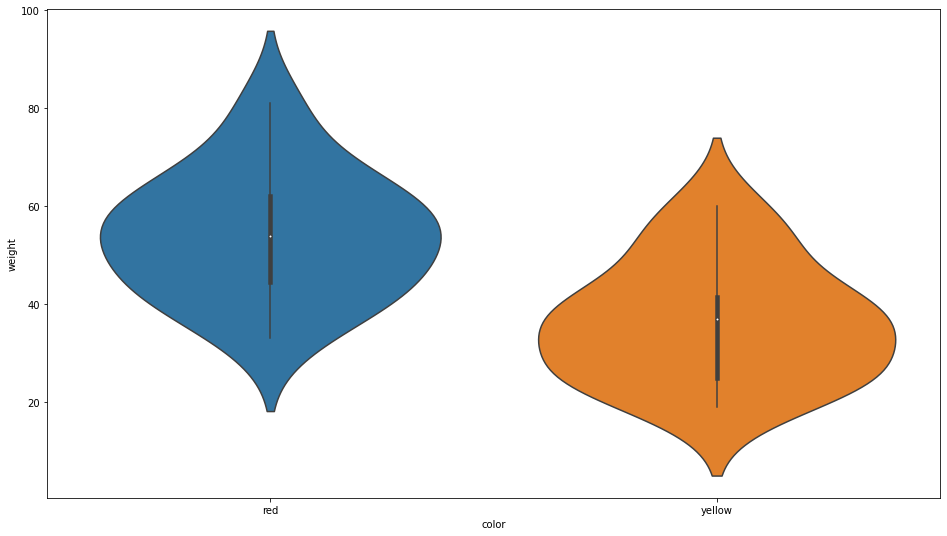

In [14]:
plumdata = pd.read_csv('plumdata.csv', index_col=0)
sns.violinplot(x='color', y='weight', data=plumdata);

In [15]:
plum_red = plumdata['weight'][plumdata['color'] == 'red'].values
plum_yel = plumdata['weight'][plumdata['color'] == 'yellow'].values
plumtt = pg.ttest(plum_red, plum_yel)
print(plumtt['CI95%'][0])

[ 8.67 27.2 ]


In [16]:
plzip = np.array(list(zip(plum_red, plum_yel)), dtype=np.int)
rs = np.zeros((B, plzip.shape[0], plzip.shape[1]), dtype=np.int)
print(rs.shape)

(10000, 15, 2)


In [17]:
for i in range(B):
    rs[i,] = resample(plzip, replace = True)
bd_init = np.mean(rs, axis=1)
print(bd_init.shape)

(10000, 2)


In [31]:
bd = bd_init[:, 0] - bd_init[:, 1]
print(bd.shape)

(10000,)


In [19]:
bootci = np.percentile(bd, (2.5, 97.5))
print(bootci)

[ 9.33333333 26.06666667]


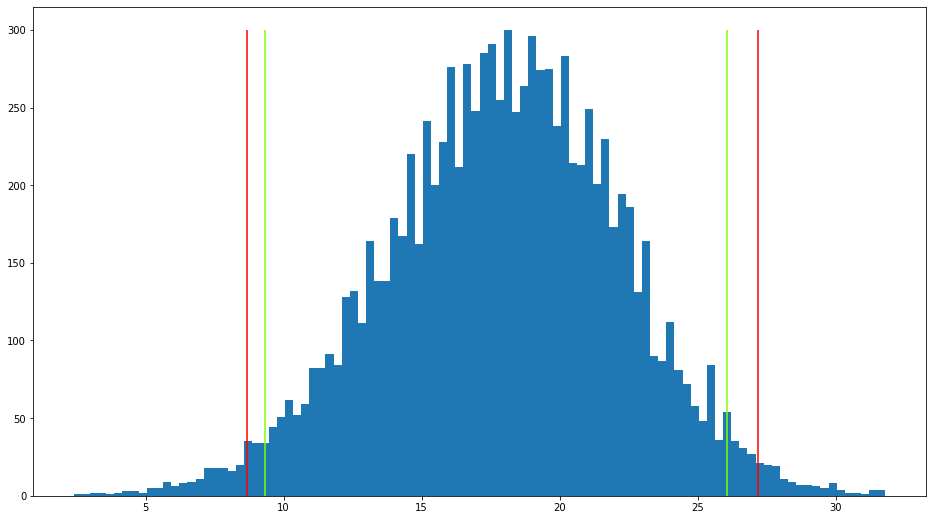

In [20]:
y, x, _ = plt.hist(bd, bins=100)
ymax = y.max()
plt.vlines(plumtt['CI95%'][0], 0, ymax, colors = 'red')
plt.vlines(bootci, 0, ymax, colors = 'chartreuse')
plt.show();

# Two-sample central values, paired

## Mean of differences

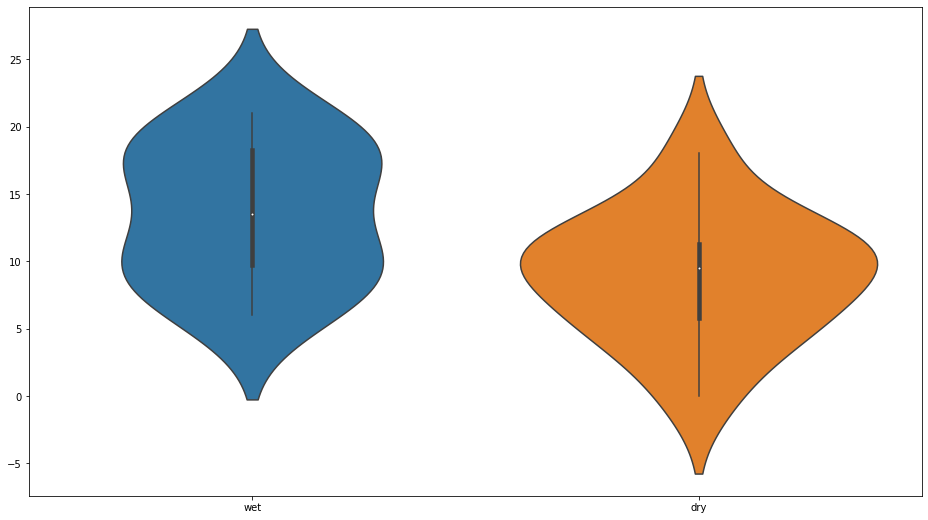

In [21]:
strength = pd.read_csv('strength.csv', index_col=0)
sns.violinplot(data=strength);

In [22]:
s_wet = strength['wet']
s_dry = strength['dry']
s_diff = s_wet.values - s_dry.values
print(s_diff)

[ 3 -4 21  0  8  3  8 -3  8  4  1  6]


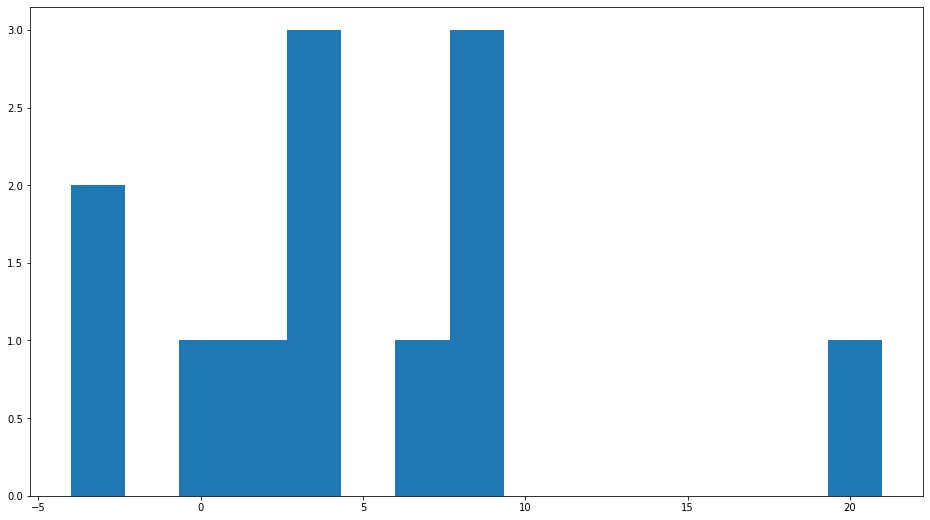

In [23]:
plt.hist(s_diff, bins=15);

In [24]:
strengthtt = pg.ttest(s_wet, s_dry, paired=True)
print(strengthtt['CI95%'][0])

[0.4  8.77]


In [25]:
rs = np.zeros((B, len(s_diff)), dtype=np.int)
for i in range(B):
    rs[i,] = resample(s_diff, replace = True)
bd = np.mean(rs, axis=1)
bootci = np.percentile(bd, (2.5, 97.5))
print(bootci)

[1.33333333 8.5       ]


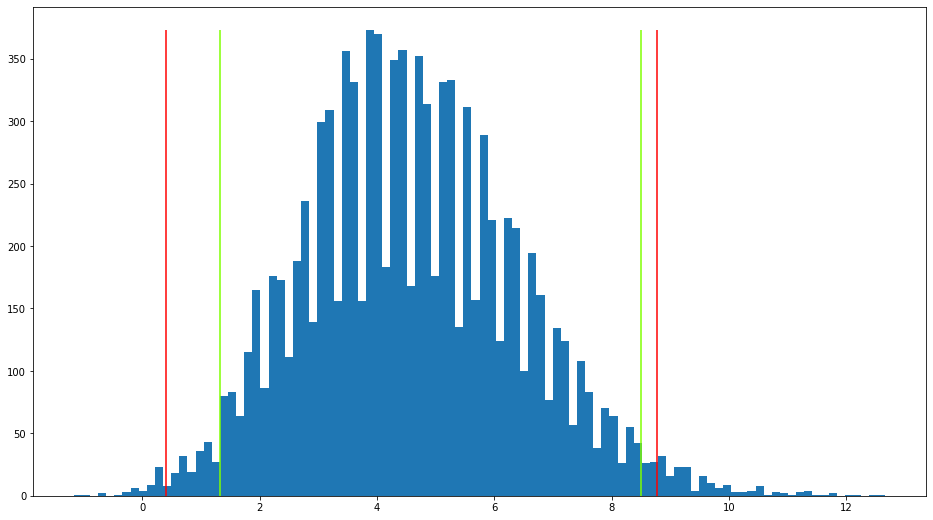

In [26]:
y, x, _ = plt.hist(bd, bins=100)
ymax = y.max()
plt.vlines(strengthtt['CI95%'][0], 0, ymax, colors = 'red')
plt.vlines(bootci, 0, ymax, colors = 'chartreuse')
plt.show();